In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re

In [3]:
os.getcwd()
os.chdir('C:\\Users\\user1\\Desktop\\데이콘\\입법_데이터_시각화\\Data')

In [4]:
people = pd.read_csv('new_people.csv',encoding='cp949')
suggest = pd.read_csv('suggest.csv')
process = pd.read_csv('process.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (2,5,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
people.head(1)

,DAESU,DAE,DAE_NM,NAME,NAME_HAN,JA,HO,BIRTH,BON,POSI,HAK,HOBBY,BOOK,SANG,DEAD,URL
0,21,제19대국회의원(경남 창원시성산구) 정당_66\r\n제21대국회의원(경남 창원시성산...,21대의원,강기윤,姜起潤,NaN,NaN,1960년 06월 04일,NaN,NaN,창원상남초등학교 \r\n창원남중학교\r\n마산공업고등학교 \r\n창원대학교 행정학...,NaN,NaN,NaN,년 월 일,http://www.rokps.or.kr/profile/profile_view.as...


In [9]:
suggest.head(1)

,BILL_ID,BILL_NO,BILL_NAME,COMMITTEE,PROPOSE_DT,PROC_RESULT,AGE,DETAIL_LINK,PROPOSER,MEMBER_LIST,RST_PROPOSER,PUBL_PROPOSER
0,PRC_A2T0Z0E9U1I6P1G3P3X9I3B7H7D9C1,2104402,독점규제 및 공정거래에 관한 법률 일부개정법률안,NaN,2020-10-05,NaN,21,http://likms.assembly.go.kr/bill/billDetail.do...,박홍근의원등12인,http://likms.assembly.go.kr/bill/coactorListPo...,박홍근,"김원이,남인순,서영석,송옥주,용혜인,윤미향,이용빈,장경태,정태호,주철현,최종윤"


In [10]:
process.head(1)

,AGE,ANNOUNCE_DT,BDG_PRESENT_DT,BDG_PROC_DT,BDG_SUBMIT_DT,BILL_ID,BILL_KIND,BILL_NAME,BILL_NO,BLANK_TCNT,...,LINK_URL,NO_TCNT,PROC_RESULT_CD,PROPOSER,PROPOSER_KIND_CD,PROPOSE_DT,RGS_PRESENT_DT,RGS_PROC_DT,VOTE_TCNT,YES_TCNT
0,21,NaN,NaN,NaN,NaN,PRC_A2Q0T0X9B2P4F0M9N3P8K5S9I7K5N9,기타,본회의 의결을 요하는 국정감사대상기관 승인의 건(과학기술정보방송통신위원장),2104197,NaN,...,https://likms.assembly.go.kr/bill/billDetail.d...,NaN,원안가결,과학기술정보방송통신위원장,위원장,2020-09-24,2020-09-24,2020-09-24,NaN,NaN


In [11]:
import missingno as msno

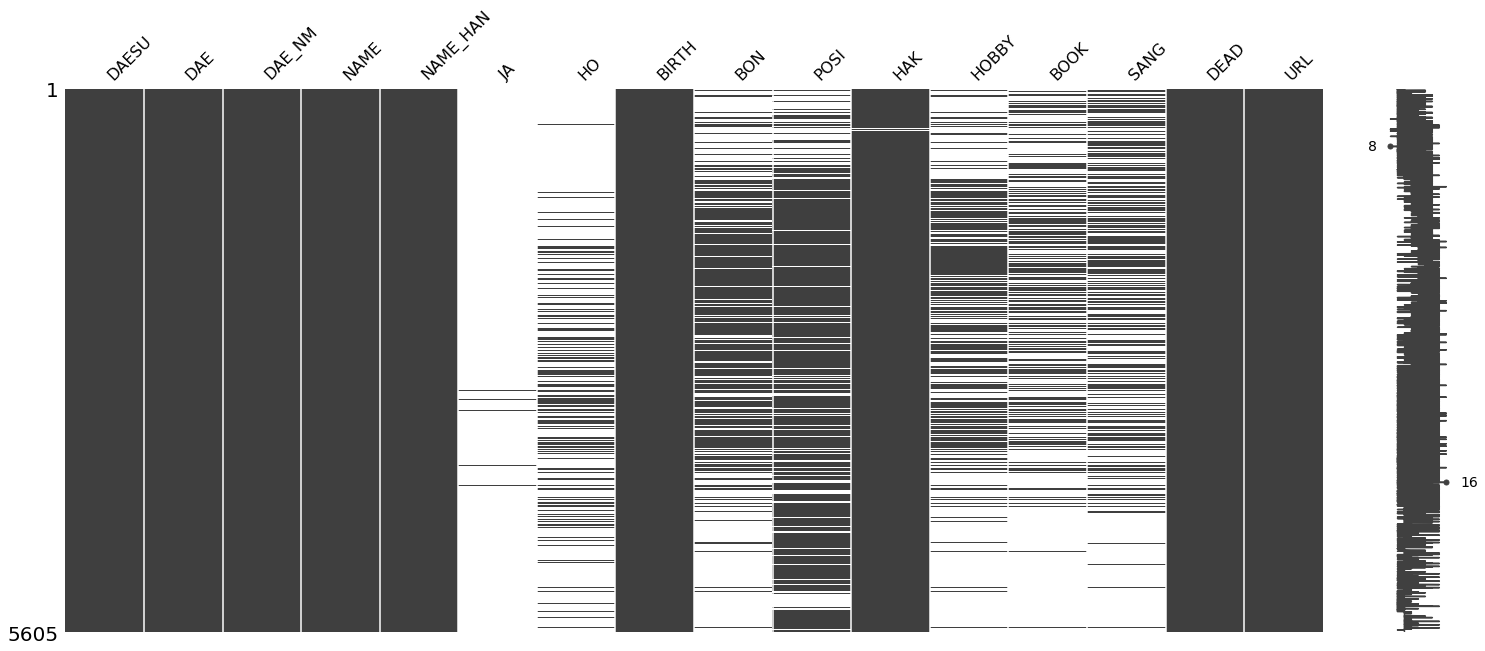

In [12]:
msno.matrix(df=people.iloc[:,:])

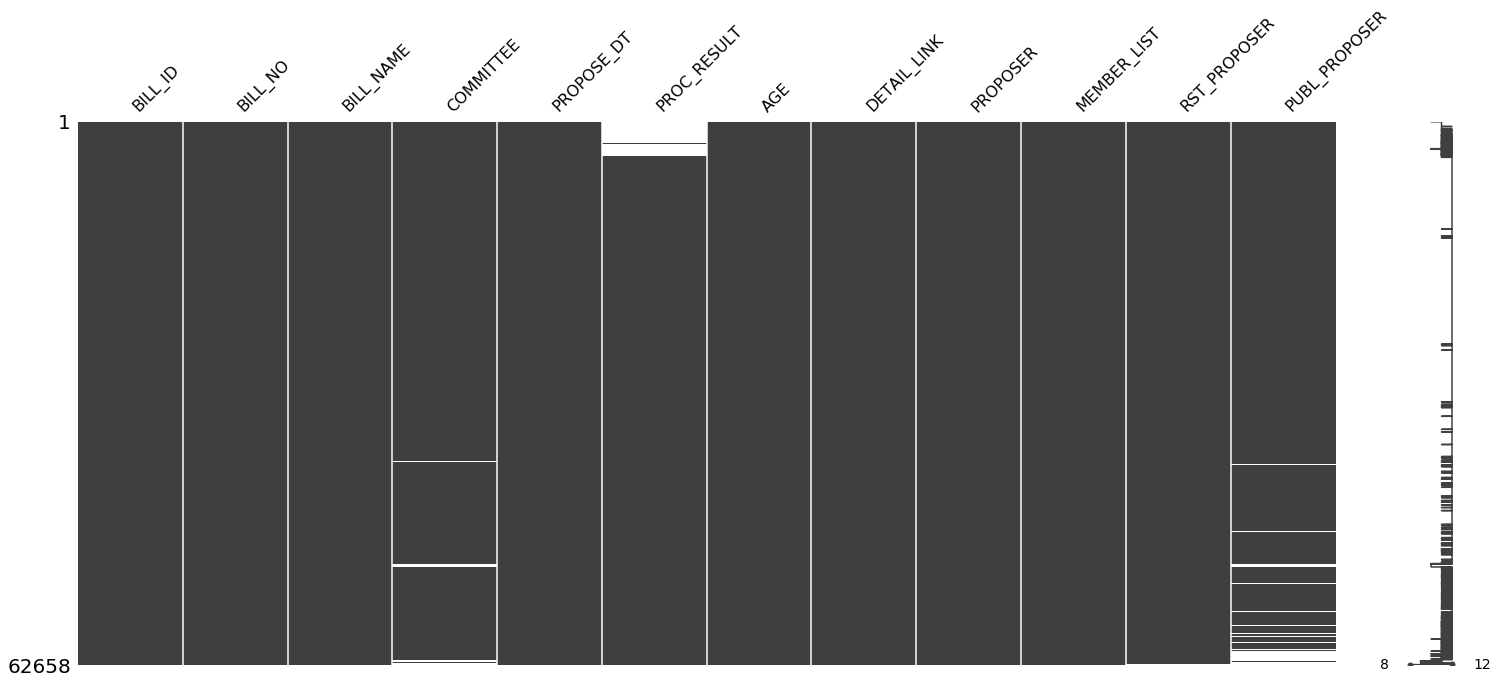

In [13]:
msno.matrix(df=suggest.iloc[:,:])

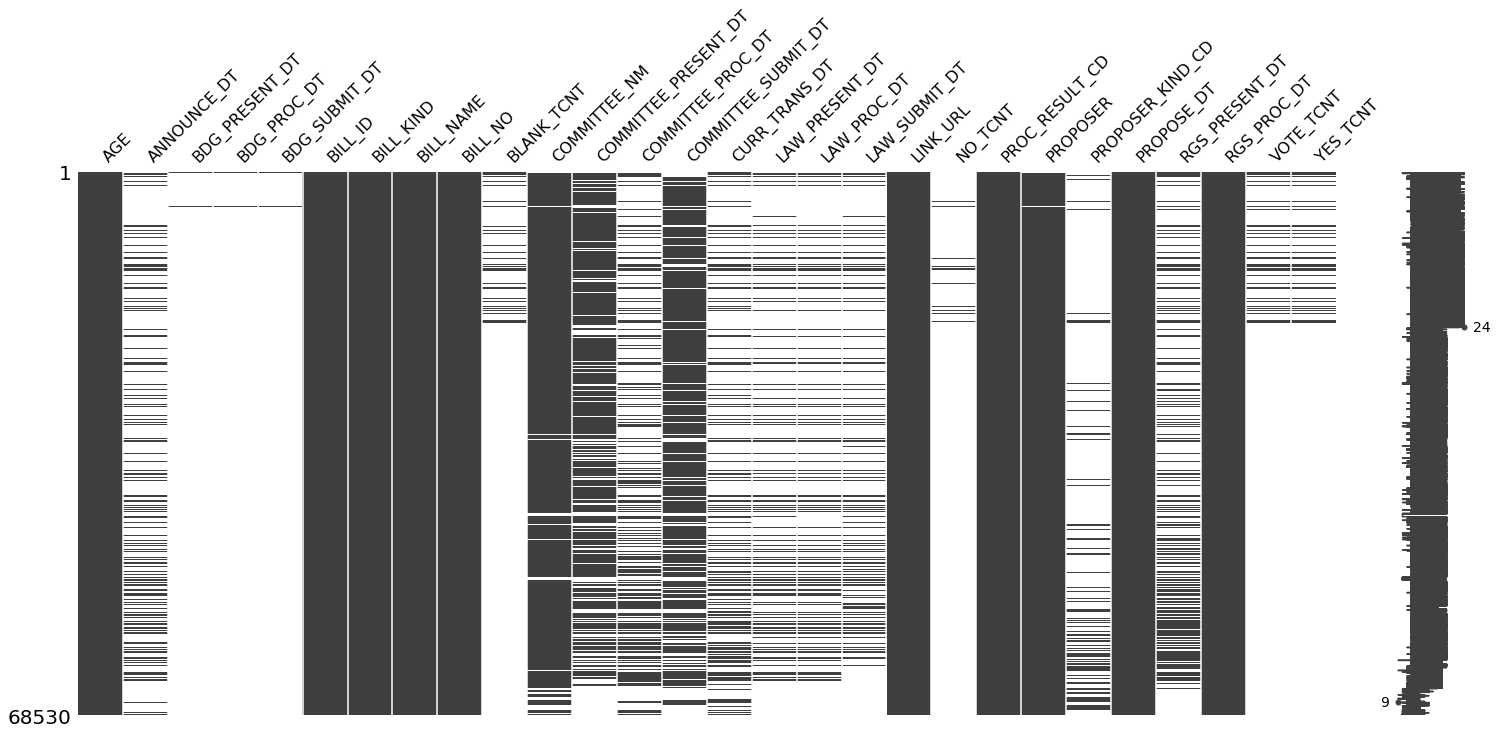

In [14]:
msno.matrix(df=process.iloc[:,:])

## Q1. 대수별 국회의원 수의 분포는 어떻게 될까?
- 시간이 지나면서 국회의원수가 점차 **증가하는 추세**를 확인 가능

In [5]:
plt.rcParams['font.family']='Malgun Gothic'

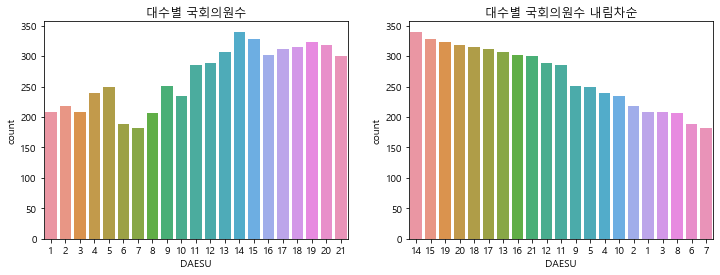

In [69]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1)
plt.title('대수별 국회의원수')
ax2 = fig.add_subplot(1,2,2)
plt.title('대수별 국회의원수 내림차순')
# 대수별 국회의원수를 막대그래프로 시각화
sns.countplot(people['DAESU'],ax=ax1)
# 대수별 국회의원수를 내림차순해 막대그래프로 시각화
sns.countplot(people['DAESU'],order=people['DAESU'].value_counts().index,ax=ax2)

## Q2. 국회의원 출생지와 대수와 관계가 있을까?

In [146]:
len(people['POSI'].value_counts())

530

In [147]:
people['POSI_province'] = people['POSI'].apply(lambda x : np.nan if pd.isnull(x) else x.split()[0])

In [148]:
people['POSI_province'].unique()

array([nan, '강원', '서울', '광주', '경기도', '울산', '충남', '경기', '전남', '경남', '충청북도',
       '대전', '충북', '파주', '전북', '경상남도', '부산', '경북', '제주', '원주', '강원도',
       '포항', '경기포천', '부여', '대구', '안동', '충청남도', '마산', '인천', '대구광역시', '일본',
       '청주', '전라북도', '전남목포', '필리핀', '광주광역시', '평양', '해남', '평남', '함북',
       '경남고성', '황해', '전주', '평북', '중국', '익산시', '아산', '대전시', '강릉', '남제주',
       '울산시', '경상북도', '황해도', '나주', '부산광역시', '평안남도', '만주', '함경남도', '제주도',
       '논산', '함경북도', '함남', '선산', '대전광역시', '인천시', '전라남도', '전라도', '서울시',
       '광주시', '서울특별시', '전북부안', '인천광역시', '신안군', '의왕', '평안북도', '대구시',
       '울산광역시', '진주', '합천', '전남도', '대전직할시', '부산시', '서울종로', '강워도', '전남보성',
       '평양시', '전북고창', '개성'], dtype=object)

In [149]:
people['POSI_province'] = people['POSI_province'].replace({'경기도':'경기','충청북도':'충북','파주':'경기','경상남도':'경남',
                                                          '원주':'강원','강원도':'강원','포항':'경북','경기포천':'경기','부여':'충남',
                                                          '충청남도':'충남','대구광역시':'대구','전라북도':'전북','전남목포':'전남',
                                                          '광주광역시':'광주','경남고성':'경남','익산시':'전북','아산':'충남','대전시':'대전',
                                                          '남제주':'제주','울산시':'울산','경상북도':'경북','황해도':'황해','나주':'전남',
                                                          '부산광역시':'부산','평안남도':'평남','함경남도':'함남','제주도':'제주','논산':'충남',
                                                          '함경북도':'함북','선산':'경북','대전광역시':'대전','인천시':'인천','전라남도':'전남',
                                                          '전라도':'전라','서울시':'서울','광주시':'광주','서울특별시':'서울','전북부안':'전북',
                                                          '인천광역시':'인천','신안군':'전남','의왕':'경기','평안북도':'평북','대구시':'대구',
                                                          '광주시':'광주','울산광역시':'울산','전남도':'전남','대전직할시':'대전','부산시':'부산',
                                                          '서울종로':'서울','강워도':'강원','전남보성':'전남','평양시':'평양','전북고창':'전북',
                                                          '안동':'경북','마산':'경남','청주':'충북','전주':'전북','진주':'경남','합천':'경남',
                                                          '강릉':'강원'})
people['POSI_province'].unique()

array([nan, '강원', '서울', '광주', '경기', '울산', '충남', '전남', '경남', '충북', '대전',
       '전북', '부산', '경북', '제주', '대구', '인천', '일본', '필리핀', '평양', '해남', '평남',
       '함북', '황해', '평북', '중국', '만주', '함남', '전라', '개성'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

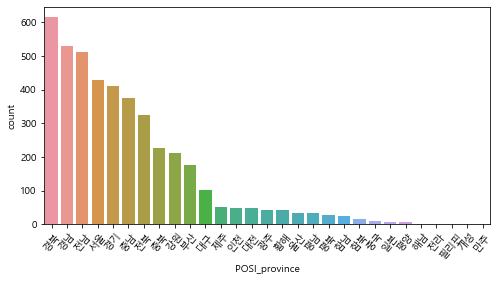

In [176]:
plt.figure(figsize=(8,4))
sns.countplot(people['POSI_province'],order=people['POSI_province'].value_counts().index)
plt.xticks(rotation=50)

## Q3. 대수별 발의법의안 건수는 상이할까?

In [164]:
suggest.head(1)

,BILL_ID,BILL_NO,BILL_NAME,COMMITTEE,PROPOSE_DT,PROC_RESULT,AGE,DETAIL_LINK,PROPOSER,MEMBER_LIST,RST_PROPOSER,PUBL_PROPOSER
0,PRC_A2T0Z0E9U1I6P1G3P3X9I3B7H7D9C1,2104402,독점규제 및 공정거래에 관한 법률 일부개정법률안,NaN,2020-10-05,NaN,21,http://likms.assembly.go.kr/bill/billDetail.do...,박홍근의원등12인,http://likms.assembly.go.kr/bill/coactorListPo...,박홍근,"김원이,남인순,서영석,송옥주,용혜인,윤미향,이용빈,장경태,정태호,주철현,최종윤"


In [165]:
suggest['AGE'].unique()

array([21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,
        4,  3,  2,  1], dtype=int64)

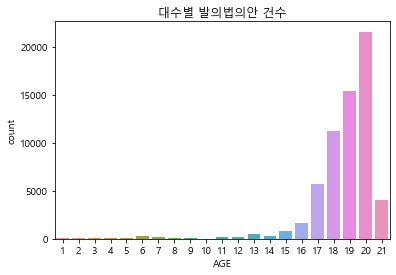

In [170]:
plt.title('대수별 발의법의안 건수')
sns.countplot(suggest['AGE'])
plt.show()

## Q4. 최근 5년간 제안일에 따른 발의법의안 건수는 상관관계가 있을까?

In [6]:
import datetime as dt
import warnings 
warnings.filterwarnings(action='ignore')

In [179]:
suggest['PROPOSE_DT'] = pd.to_datetime(suggest['PROPOSE_DT'])

In [180]:
suggest['PROPOSE_DT'].dtype

dtype('<M8[ns]')

In [208]:
mask = (suggest['PROPOSE_DT']>='2016-01-01')&(suggest['PROPOSE_DT']<'2021-01-01')
filtered_df = suggest.loc[mask]

In [209]:
len(filtered_df) # 5년간(2017~2020년)의 suggest 데이터

25720

In [210]:
filtered_df['PROPOSE_DT_YEAR'] = filtered_df['PROPOSE_DT'].dt.year
filtered_df['PROPOSE_DT_MONTH'] = filtered_df['PROPOSE_DT'].dt.month
filtered_df.head(2)

,BILL_ID,BILL_NO,BILL_NAME,COMMITTEE,PROPOSE_DT,PROC_RESULT,AGE,DETAIL_LINK,PROPOSER,MEMBER_LIST,RST_PROPOSER,PUBL_PROPOSER,PROPOSE_DT_YEAR,PROPOSE_DT_MONTH
0,PRC_A2T0Z0E9U1I6P1G3P3X9I3B7H7D9C1,2104402,독점규제 및 공정거래에 관한 법률 일부개정법률안,NaN,2020-10-05,NaN,21,http://likms.assembly.go.kr/bill/billDetail.do...,박홍근의원등12인,http://likms.assembly.go.kr/bill/coactorListPo...,박홍근,"김원이,남인순,서영석,송옥주,용혜인,윤미향,이용빈,장경태,정태호,주철현,최종윤",2020,10
1,PRC_I2M0O1G0U0P5E1U8T4B6Z0R9M8G5X0,2104401,지방교육재정교부금법 일부개정법률안,NaN,2020-10-05,NaN,21,http://likms.assembly.go.kr/bill/billDetail.do...,서영교의원 등 10인,http://likms.assembly.go.kr/bill/coactorListPo...,서영교,"김병기,서삼석,신정훈,오영환,윤재갑,이개호,이성만,전혜숙,최형두",2020,10


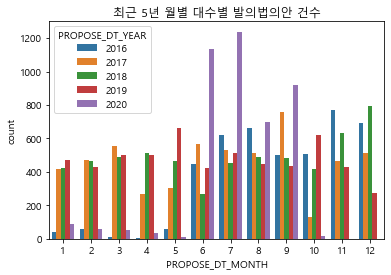

In [249]:
plt.title('최근 5년 월별 대수별 발의법의안 건수')
sns.countplot(filtered_df['PROPOSE_DT_MONTH'],
             hue = filtered_df['PROPOSE_DT_YEAR'])

In [234]:
filtered_16 = filtered_df[filtered_df['PROPOSE_DT_YEAR']==2016]['PROPOSE_DT_MONTH'].value_counts().sort_index()
filtered_17 = filtered_df[filtered_df['PROPOSE_DT_YEAR']==2017]['PROPOSE_DT_MONTH'].value_counts().sort_index()
filtered_18 = filtered_df[filtered_df['PROPOSE_DT_YEAR']==2018]['PROPOSE_DT_MONTH'].value_counts().sort_index()
filtered_19 = filtered_df[filtered_df['PROPOSE_DT_YEAR']==2019]['PROPOSE_DT_MONTH'].value_counts().sort_index()
filtered_20 = filtered_df[filtered_df['PROPOSE_DT_YEAR']==2020]['PROPOSE_DT_MONTH'].value_counts().sort_index()

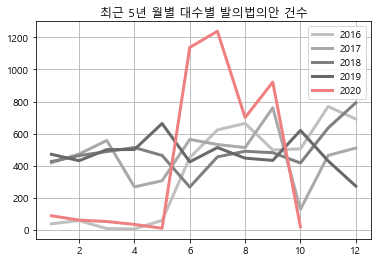

In [248]:
fig, ax = plt.subplots()
plt.title('최근 5년 월별 대수별 발의법의안 건수')
ax.plot(filtered_16,linewidth=3,color='silver', label='2016')
ax.plot(filtered_17,linewidth=3,color='darkgray',label='2017')
ax.plot(filtered_18,linewidth=3,color='gray',label='2018')
ax.plot(filtered_19,linewidth=3,color='dimgray',label='2019')
ax.plot(filtered_20,linewidth=3,color='lightcoral',label='2020')
plt.grid(True)
plt.legend()

## Q5. 대수에 따른 발의법의안 처리상태의 상관관계가 존재할까?

- **발의법의안 처리상태**
    1. 대안반영폐기 : 대안을 제안함에 따라 대안에 반영된 의안의 경우, 다른 의안과 하나로 통합돼 본회의에 부의되지 않음
    2. 철회
    3. 수정가결
    4. 원안가결
    5. 폐기
    6. 임기만료폐기
    7. 부결
    8. 수정안반영폐기
    9. 비상국무회의로이관
    10. 회귀불계속폐기 : 임기가 같을 시 회귀 중 의결되지 않은 법안은 폐기되지 않고 다름 회귀에도 계속 심사할 수 있지만 임기가 종료되면 처리되지 않은 법안은 폐기됨

In [252]:
len(suggest['PROC_RESULT'].unique()) # 총 11-1(nan)= 10건의 발의법의안 처리상태

11

In [253]:
suggest['PROC_RESULT'].unique()

array([nan, '대안반영폐기', '철회', '수정가결', '원안가결', '폐기', '임기만료폐기', '부결',
       '수정안반영폐기', '비상국무회의로이관', '회기불계속폐기'], dtype=object)

In [288]:
grouped = suggest.groupby(['AGE','PROC_RESULT']).size().to_frame()
grouped = grouped.rename(columns={0:'count'})
grouped = grouped.dropna(axis=0)
grouped = grouped.reset_index()

In [289]:
grouped['cum_count']=grouped.groupby('AGE')['count'].cumsum(axis=0)
grouped['norm_count']=grouped.groupby('AGE')['count'].apply(lambda x : x/sum(x))
grouped['cum_norm_count']=grouped.groupby('AGE')['norm_count'].cumsum(axis=0)
grouped = grouped.sort_values(by=['cum_norm_count'],ascending=False)

In [291]:
grouped.tail(10)

,AGE,PROC_RESULT,count,cum_count,norm_count,cum_norm_count
122,20,수정안반영폐기,41,6041,0.001899,0.279754
123,20,원안가결,569,6610,0.026350,0.306104
124,20,임기만료폐기,14646,21256,0.678244,0.984348
125,20,철회,215,21471,0.009956,0.994304
126,20,폐기,123,21594,0.005696,1.000000
127,21,대안반영폐기,100,100,0.502513,0.502513
128,21,수정가결,31,131,0.155779,0.658291
129,21,원안가결,17,148,0.085427,0.743719
130,21,철회,28,176,0.140704,0.884422
131,21,폐기,23,199,0.115578,1.000000


Text(0.5, 1.0, '대수별 발의법의안 처리방법 비율')

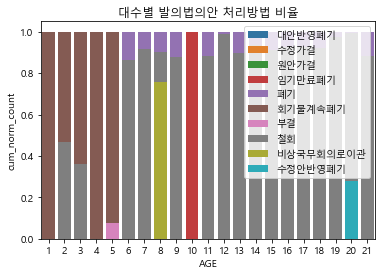

In [296]:
sns.barplot(x='AGE',y='cum_norm_count',hue='PROC_RESULT',data=grouped,dodge=False)
plt.legend(loc='upper right')
plt.title('대수별 발의법의안 처리방법 비율')

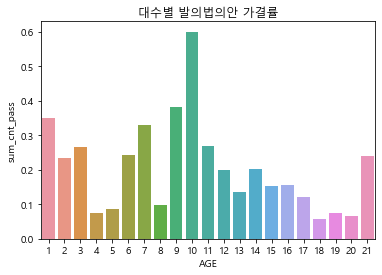

In [336]:
mask1 = (grouped['PROC_RESULT']=='원안가결')|(grouped['PROC_RESULT']=='수정가결')
grouped_mask1 = grouped.loc[mask1]
grouped_pass = grouped_mask1[['AGE','norm_count']]
grouped_sum = grouped_pass.groupby('AGE')['norm_count'].sum().to_frame()
grouped_sum = pd.DataFrame({'sum_cnt_pass':grouped_sum['norm_count']})
grouped_sum = grouped_sum.reset_index()

plt.title('대수별 발의법의안 가결률')
sns.barplot(x='AGE',y='sum_cnt_pass',data=grouped_sum)

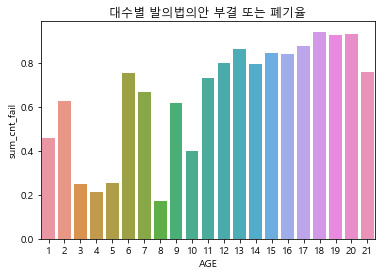

In [338]:
mask2 = (grouped['PROC_RESULT']=='대안반영폐기')|(grouped['PROC_RESULT']=='임기만료폐기')|(grouped['PROC_RESULT']=='폐기')|(grouped['PROC_RESULT']=='회기물계속폐기')|(grouped['PROC_RESULT']=='부결')|(grouped['PROC_RESULT']=='철회')|(grouped['PROC_RESULT']=='수정안반영폐기')
grouped_mask2 = grouped.loc[mask2]
grouped_fail = grouped_mask2[['AGE','norm_count']]
grouped_sum = grouped_fail.groupby('AGE')['norm_count'].sum().to_frame()
grouped_sum = pd.DataFrame({'sum_cnt_fail':grouped_sum['norm_count']})
grouped_sum = grouped_sum.reset_index()

plt.title('대수별 발의법의안 부결 또는 폐기율')
sns.barplot(x='AGE',y='sum_cnt_fail',data=grouped_sum)

## Q6. 대수별 대표발의자 현황은 어떨까?

In [340]:
suggest.head(2)

,BILL_ID,BILL_NO,BILL_NAME,COMMITTEE,PROPOSE_DT,PROC_RESULT,AGE,DETAIL_LINK,PROPOSER,MEMBER_LIST,RST_PROPOSER,PUBL_PROPOSER
0,PRC_A2T0Z0E9U1I6P1G3P3X9I3B7H7D9C1,2104402,독점규제 및 공정거래에 관한 법률 일부개정법률안,NaN,2020-10-05,NaN,21,http://likms.assembly.go.kr/bill/billDetail.do...,박홍근의원등12인,http://likms.assembly.go.kr/bill/coactorListPo...,박홍근,"김원이,남인순,서영석,송옥주,용혜인,윤미향,이용빈,장경태,정태호,주철현,최종윤"
1,PRC_I2M0O1G0U0P5E1U8T4B6Z0R9M8G5X0,2104401,지방교육재정교부금법 일부개정법률안,NaN,2020-10-05,NaN,21,http://likms.assembly.go.kr/bill/billDetail.do...,서영교의원 등 10인,http://likms.assembly.go.kr/bill/coactorListPo...,서영교,"김병기,서삼석,신정훈,오영환,윤재갑,이개호,이성만,전혜숙,최형두"


In [350]:
suggest['RST_PROPOSER'].value_counts()

이명수    855
황주홍    835
강창일    500
오제세    463
김우남    457
이찬열    455
박광온    452
주승용    425
양승조    419
심재철    339
김상희    321
김춘진    318
남인순    294
김도읍    293
서영교    290
박인숙    284
전현희    284
김동철    279
김태원    277
홍준표    275
김관영    272
함진규    272
박홍근    269
박정     266
노웅래    261
조경태    251
송옥주    250
정청래    248
정성호    248
이상민    247
      ... 
김상영      1
박상묵      1
김명윤      1
양성철      1
임무웅      1
윤철상      1
신태권      1
황인성      1
박경수      1
이원범      1
손승덕      1
지연태      1
조순승      1
안건일      1
이춘구      1
장성만      1
진치범      1
류호정      1
장영순      1
한영수      1
허청일      1
김일동      1
고귀남      1
최원호      1
김석원      1
류승번      1
고건       1
오세응      1
맹은재      1
이영언      1
Name: RST_PROPOSER, Length: 1813, dtype: int64

In [351]:
people[people['NAME']=='이명수']

,DAESU,DAE,DAE_NM,NAME,NAME_HAN,JA,HO,BIRTH,BON,POSI,HAK,HOBBY,BOOK,SANG,DEAD,URL,POSI_province
189,21,제18대국회의원(충남 아산) 정당_52\r\n제19대국회의원(충남 아산) 정당_52...,21대의원,이명수,李明洙,NaN,NaN,1955년 02월 11일,NaN,충남 아산,· 대전고등학교\r\n· 성균관대학교 대학원 행정학 (박사)\r\n· 제22회...,"천주교 / 독서,음악감상",숨은 사람 찾기\r\n붉은마음 푸른 대한\r\n코리아 하모니\r\n국민여러분과 함께...,"근정포장,홍조근정훈장",년 월 일,http://www.rokps.or.kr/profile/profile_view.as...,충남
502,20,제18대국회의원(충남 아산) 정당_52\r\n제19대국회의원(충남 아산) 정당_52...,20대의원,이명수,李明洙,NaN,NaN,1955년 02월 11일,NaN,충남 아산,· 대전고등학교\r\n· 성균관대학교 대학원 행정학 (박사)\r\n· 제22회...,"천주교 / 독서,음악감상",숨은 사람 찾기\r\n붉은마음 푸른 대한\r\n코리아 하모니\r\n국민여러분과 함께...,"근정포장,홍조근정훈장",년 월 일,http://www.rokps.or.kr/profile/profile_view.as...,충남
827,19,제18대국회의원(충남 아산) 정당_52\r\n제19대국회의원(충남 아산) 정당_52...,19대의원,이명수,李明洙,NaN,NaN,1955년 02월 11일,NaN,충남 아산,· 대전고등학교\r\n· 성균관대학교 대학원 행정학 (박사)\r\n· 제22회...,"천주교 / 독서,음악감상",숨은 사람 찾기\r\n붉은마음 푸른 대한\r\n코리아 하모니\r\n국민여러분과 함께...,"근정포장,홍조근정훈장",년 월 일,http://www.rokps.or.kr/profile/profile_view.as...,충남
1123,18,제18대국회의원(충남 아산) 정당_52\r\n제19대국회의원(충남 아산) 정당_52...,18대의원,이명수,李明洙,NaN,NaN,1955년 02월 11일,NaN,충남 아산,· 대전고등학교\r\n· 성균관대학교 대학원 행정학 (박사)\r\n· 제22회...,"천주교 / 독서,음악감상",숨은 사람 찾기\r\n붉은마음 푸른 대한\r\n코리아 하모니\r\n국민여러분과 함께...,"근정포장,홍조근정훈장",년 월 일,http://www.rokps.or.kr/profile/profile_view.as...,충남


In [352]:
people[people['NAME']=='황주홍']

,DAESU,DAE,DAE_NM,NAME,NAME_HAN,JA,HO,BIRTH,BON,POSI,HAK,HOBBY,BOOK,SANG,DEAD,URL,POSI_province
617,20,제19대국회의원(전남 장흥군강진군영암군) 정당_45\r\n제20대국회의원(전남 고흥...,20대의원,황주홍,黃柱洪,NaN,NaN,1952년 02월 27일,NaN,NaN,광주제일고등학교\r\n연세대학교 정치외교학 학사\r\n연세대학교 대학원 정치학 석사...,NaN,패자부활전이 있는 나라\r\n패자부활전 희망의 다른 이름\r\n지도자론\r\n미래학...,제54회 대한체육회 체육상 시상식 공로부문 우수상\r\n윈저어워즈 한국축구대상 축구...,년 월 일,http://www.rokps.or.kr/profile/profile_view.as...,NaN
940,19,제19대국회의원(전남 장흥군강진군영암군) 정당_45\r\n제20대국회의원(전남 고흥...,19대의원,황주홍,黃柱洪,NaN,NaN,1952년 02월 27일,NaN,NaN,광주제일고등학교\r\n연세대학교 정치외교학 학사\r\n연세대학교 대학원 정치학 석사...,NaN,패자부활전이 있는 나라\r\n패자부활전 희망의 다른 이름\r\n지도자론\r\n미래학...,제54회 대한체육회 체육상 시상식 공로부문 우수상\r\n윈저어워즈 한국축구대상 축구...,년 월 일,http://www.rokps.or.kr/profile/profile_view.as...,NaN


In [353]:
people[people['NAME']=='강창일']

,DAESU,DAE,DAE_NM,NAME,NAME_HAN,JA,HO,BIRTH,BON,POSI,HAK,HOBBY,BOOK,SANG,DEAD,URL,POSI_province
304,20,제17대국회의원(제주 제주·북제주갑) 정당_21\r\n제18대국회의원(제주갑) 정당...,20대의원,강창일,姜昌一,NaN,NaN,1952년 01월 28일,진주,제주,· 오현고등학교(제주)\r\n· 서울대학교 국사학과 (학사)\r\n· 일본 동경대학...,"불교 / 바둑, 독서","명성황후시해사건(공저), \r\n오늘에 본 친일 문제와 일본의 조선침략론(공저), ...",NaN,년 월 일,http://www.rokps.or.kr/profile/profile_view.as...,제주
626,19,제17대국회의원(제주 제주·북제주갑) 정당_21\r\n제18대국회의원(제주갑) 정당...,19대의원,강창일,姜昌一,NaN,NaN,1952년 01월 28일,진주,제주,· 오현고등학교(제주)\r\n· 서울대학교 국사학과 (학사)\r\n· 일본 동경대학...,"불교 / 바둑, 독서","명성황후시해사건(공저), \r\n오늘에 본 친일 문제와 일본의 조선침략론(공저), ...",NaN,년 월 일,http://www.rokps.or.kr/profile/profile_view.as...,제주
953,18,제17대국회의원(제주 제주·북제주갑) 정당_21\r\n제18대국회의원(제주갑) 정당...,18대의원,강창일,姜昌一,NaN,NaN,1952년 01월 28일,진주,제주,· 오현고등학교(제주)\r\n· 서울대학교 국사학과 (학사)\r\n· 일본 동경대학...,"불교 / 바둑, 독서","명성황후시해사건(공저), \r\n오늘에 본 친일 문제와 일본의 조선침략론(공저), ...",NaN,년 월 일,http://www.rokps.or.kr/profile/profile_view.as...,제주
1263,17,제17대국회의원(제주 제주·북제주갑) 정당_21\r\n제18대국회의원(제주갑) 정당...,17대의원,강창일,姜昌一,NaN,NaN,1952년 01월 28일,진주,제주,· 오현고등학교(제주)\r\n· 서울대학교 국사학과 (학사)\r\n· 일본 동경대학...,"불교 / 바둑, 독서","명성황후시해사건(공저), \r\n오늘에 본 친일 문제와 일본의 조선침략론(공저), ...",NaN,년 월 일,http://www.rokps.or.kr/profile/profile_view.as...,제주


In [354]:
people[people['NAME']=='오제세']

,DAESU,DAE,DAE_NM,NAME,NAME_HAN,JA,HO,BIRTH,BON,POSI,HAK,HOBBY,BOOK,SANG,DEAD,URL,POSI_province
468,20,제17대국회의원(충북 청주흥덕갑) 정당_21\r\n제18대국회의원(충북 청주흥덕갑)...,20대의원,오제세,吳濟世,NaN,NaN,1949년 04월 05일,보성,충북 청주,· 경기고등학교\r\n· 서울대학교 법과대학 행정학과 (학사)\r\n· 서울대...,천주교 / 테니스,NaN,NaN,년 월 일,http://www.rokps.or.kr/profile/profile_view.as...,충북
792,19,제17대국회의원(충북 청주흥덕갑) 정당_21\r\n제18대국회의원(충북 청주흥덕갑)...,19대의원,오제세,吳濟世,NaN,NaN,1949년 04월 05일,보성,충북 청주,· 경기고등학교\r\n· 서울대학교 법과대학 행정학과 (학사)\r\n· 서울대...,천주교 / 테니스,NaN,NaN,년 월 일,http://www.rokps.or.kr/profile/profile_view.as...,충북
1094,18,제17대국회의원(충북 청주흥덕갑) 정당_21\r\n제18대국회의원(충북 청주흥덕갑)...,18대의원,오제세,吳濟世,NaN,NaN,1949년 04월 05일,보성,충북 청주,· 경기고등학교\r\n· 서울대학교 법과대학 행정학과 (학사)\r\n· 서울대...,천주교 / 테니스,NaN,NaN,년 월 일,http://www.rokps.or.kr/profile/profile_view.as...,충북
1414,17,제17대국회의원(충북 청주흥덕갑) 정당_21\r\n제18대국회의원(충북 청주흥덕갑)...,17대의원,오제세,吳濟世,NaN,NaN,1949년 04월 05일,보성,충북 청주,· 경기고등학교\r\n· 서울대학교 법과대학 행정학과 (학사)\r\n· 서울대...,천주교 / 테니스,NaN,NaN,년 월 일,http://www.rokps.or.kr/profile/profile_view.as...,충북


In [355]:
people[people['NAME']=='김우남']

,DAESU,DAE,DAE_NM,NAME,NAME_HAN,JA,HO,BIRTH,BON,POSI,HAK,HOBBY,BOOK,SANG,DEAD,URL,POSI_province
666,19,제17대 국회의원(제주·북제주을) 정당_21\r\n제18대 국회의원(제주 제주을) ...,19대의원,김우남,金宇南,NaN,NaN,1955년 05월 23일,광산,제주 북제주,&#8226; 세화고등학교\r\n&#8226; 제주대학교 경상대학 경영학과 (학사)...,독서,NaN,국정감사우수의원 (국정감사 NGO모니터단),년 월 일,http://www.rokps.or.kr/profile/profile_view.as...,제주
995,18,제17대 국회의원(제주·북제주을) 정당_21\r\n제18대 국회의원(제주 제주을) ...,18대의원,김우남,金宇南,NaN,NaN,1955년 05월 23일,광산,제주 북제주,&#8226; 세화고등학교\r\n&#8226; 제주대학교 경상대학 경영학과 (학사)...,독서,NaN,국정감사우수의원 (국정감사 NGO모니터단),년 월 일,http://www.rokps.or.kr/profile/profile_view.as...,제주
1309,17,제17대 국회의원(제주·북제주을) 정당_21\r\n제18대 국회의원(제주 제주을) ...,17대의원,김우남,金宇南,NaN,NaN,1955년 05월 23일,광산,제주 북제주,&#8226; 세화고등학교\r\n&#8226; 제주대학교 경상대학 경영학과 (학사)...,독서,NaN,국정감사우수의원 (국정감사 NGO모니터단),년 월 일,http://www.rokps.or.kr/profile/profile_view.as...,제주


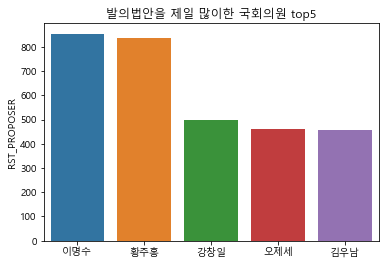

In [82]:
top5 = suggest['RST_PROPOSER'].value_counts()[:5]
plt.title('발의법안을 제일 많이한 국회의원 top5')
sns.barplot(x=top5.index,y=top5)

### ※번외 연임을 하지 않은 국회의원 중 발의법의안 건수가 누가 많을까? 

In [23]:
len(people)

5605

In [58]:
dropped_ppl = people.drop_duplicates(['NAME','NAME_HAN','BIRTH','BON'],keep=False)

In [59]:
suggest.head(2)

,BILL_ID,BILL_NO,BILL_NAME,COMMITTEE,PROPOSE_DT,PROC_RESULT,AGE,DETAIL_LINK,PROPOSER,MEMBER_LIST,RST_PROPOSER,PUBL_PROPOSER
0,PRC_A2T0Z0E9U1I6P1G3P3X9I3B7H7D9C1,2104402,독점규제 및 공정거래에 관한 법률 일부개정법률안,NaN,2020-10-05,NaN,21,http://likms.assembly.go.kr/bill/billDetail.do...,박홍근의원등12인,http://likms.assembly.go.kr/bill/coactorListPo...,박홍근,"김원이,남인순,서영석,송옥주,용혜인,윤미향,이용빈,장경태,정태호,주철현,최종윤"
1,PRC_I2M0O1G0U0P5E1U8T4B6Z0R9M8G5X0,2104401,지방교육재정교부금법 일부개정법률안,NaN,2020-10-05,NaN,21,http://likms.assembly.go.kr/bill/billDetail.do...,서영교의원 등 10인,http://likms.assembly.go.kr/bill/coactorListPo...,서영교,"김병기,서삼석,신정훈,오영환,윤재갑,이개호,이성만,전혜숙,최형두"


In [60]:
name_list = dropped_ppl['NAME'].to_list()
suggest_copy = suggest

In [65]:
name_list = dropped_ppl['NAME'].to_list()
suggest_copy = suggest
suggest_copy['RST_PROPOSER'] = suggest_copy['RST_PROPOSER'].apply(lambda x : x if x in name_list else np.nan)
len(suggest_copy['RST_PROPOSER'].unique()) # 연임을 하지 않은 국회의원 중 발의법의안을 낸 개별 대표자 수

865

In [80]:
suggest_copy = suggest_copy[(suggest_copy['RST_PROPOSER']!='np.nan') & (suggest_copy['RST_PROPOSER']!='nan')]
len(suggest_copy['RST_PROPOSER'].unique())

864

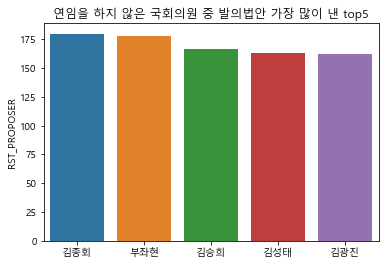

In [83]:
dropped_top5 = suggest_copy['RST_PROPOSER'].value_counts()[:5]
plt.title('연임을 하지 않은 국회의원 중 발의법안 가장 많이 낸 top5')
sns.barplot(x=dropped_top5.index,y=dropped_top5)

## Q7. 대수별 법률안명의 관계는 어떨까?

In [361]:
suggest.head(2)

,BILL_ID,BILL_NO,BILL_NAME,COMMITTEE,PROPOSE_DT,PROC_RESULT,AGE,DETAIL_LINK,PROPOSER,MEMBER_LIST,RST_PROPOSER,PUBL_PROPOSER
0,PRC_A2T0Z0E9U1I6P1G3P3X9I3B7H7D9C1,2104402,독점규제 및 공정거래에 관한 법률 일부개정법률안,NaN,2020-10-05,NaN,21,http://likms.assembly.go.kr/bill/billDetail.do...,박홍근의원등12인,http://likms.assembly.go.kr/bill/coactorListPo...,박홍근,"김원이,남인순,서영석,송옥주,용혜인,윤미향,이용빈,장경태,정태호,주철현,최종윤"
1,PRC_I2M0O1G0U0P5E1U8T4B6Z0R9M8G5X0,2104401,지방교육재정교부금법 일부개정법률안,NaN,2020-10-05,NaN,21,http://likms.assembly.go.kr/bill/billDetail.do...,서영교의원 등 10인,http://likms.assembly.go.kr/bill/coactorListPo...,서영교,"김병기,서삼석,신정훈,오영환,윤재갑,이개호,이성만,전혜숙,최형두"


In [366]:
len(suggest['BILL_NAME'].unique())

7155

In [276]:
suggest_copy = suggest

In [277]:
suggest_copy['token'] = ''
suggest_copy.head(1)

,BILL_ID,BILL_NO,BILL_NAME,COMMITTEE,PROPOSE_DT,PROC_RESULT,AGE,DETAIL_LINK,PROPOSER,MEMBER_LIST,RST_PROPOSER,PUBL_PROPOSER,token
0,PRC_A2T0Z0E9U1I6P1G3P3X9I3B7H7D9C1,2104402,독점규제 및 공정거래에 관한 법률 일부개정법률안,NaN,2020-10-05,NaN,21,http://likms.assembly.go.kr/bill/billDetail.do...,박홍근의원등12인,http://likms.assembly.go.kr/bill/coactorListPo...,박홍근,"김원이,남인순,서영석,송옥주,용혜인,윤미향,이용빈,장경태,정태호,주철현,최종윤",


In [278]:
suggest_copy['BILL_NAME'] = suggest_copy['BILL_NAME'].apply(lambda x : x.split()) 

In [279]:
suggest_copy['BILL_NAME'] = suggest_copy['BILL_NAME'].apply(lambda x : x[0]) 

In [280]:
suggest_copy = suggest_copy.groupby(['AGE','BILL_NAME']).size().to_frame()
suggest_copy = suggest_copy.reset_index()
suggest_copy = suggest_copy.rename(columns={0:'count'})

In [283]:
suggest_copy

,AGE,BILL_NAME,count
0,1,계리사법안,1
1,1,계엄법안,1
2,1,곡물검사규칙중개정법률안,1
3,1,곡물검사법안,1
4,1,관세에관한임시조치법안,1
5,1,교육법중개정법률안,2
6,1,국가공무원법중개정법률안,2
7,1,국립극장설치법안,1
8,1,국책심의회설치법안,1
9,1,국회법중개정법률안,2


In [281]:
def top_5(suggest_copy,n=5,column='count'):
    return suggest_copy.sort_values(by='count',ascending=False)[:n]
grouped_top5 = suggest_copy.groupby('AGE').apply(top_5,column='count',n=5)

In [284]:
grouped_top5

AGE                       BILL_NAME  count
AGE                                                  
1   42       1                     정부조직법중개정법률안      9
    25       1                  반민족행위처벌법중개정법률안      6
    21       1                     농지개혁법중개정법률안      4
    44       1                     지방자치법중개정법률안      3
    12       1                   국회의원선거법중개정법률안      3
2   68       2                   국회의원선거법중개정법률안     18
    66       2                       국회법중개정법률안      5
    114      2                     지방자치법중개정법률안      5
    110      2                     정부조직법중개정법률안      5
    74       2                     농지개혁법중개정법률안      4
3   201      3                     지방자치법중개정법률안      9
    164      3                     법원조직법중개정법률안      4
    144      3                       국회법중개정법률안      3
    179      3                 시·군행정구역변경에관한법률안      3
    174      3                      소득세법중개정법률안      2
4   234      4                      물품세법중개정법률안      4
    259      4                  임시토지수득세법중개정법률안      3
    233      4                          면화장려법안      3
    217      4                       교육법중개정법률안      3
    270      4                        집회에관한법률안      3
5   344      5                     지방자치법중개정법률안     12
    348      5                         헌법재판소법안      3
    311      5                      부정축재특별처리법안      3
    286      5                   국회의원선거법중개정법률안      3
    293      5  대한금융조합연합회와금융조합의청산재산처리에관한특별조치법안      2
6   386      6                       국회법중개정법률안     12
    468      6                      소득세법중개정법률안      7
    521      6                     정부조직법중개정법률안      6
    363      6                       관세법중개정법률안      6
    469      6                      수산업법중개정법률안      5
...        ...                             ...    ...
16  2509    16                   조세특례제한법중개정법률안     61
    2140    16                       국회법중개정법률안     41
    2069    16              공직선거및선거부정방지법중개정법률안     34
    2549    16                      지방세법중개정법률안     22
    2215    16                     도로교통법중개정법률안     22
17  4080    17                         조세특례제한법    118
    2864    17                           공직선거법    102
    3054    17                             국회법     97
    4159    17                            지방세법     75
    3624    17                            소득세법     70
18  5884    18                         조세특례제한법    344
    4727    18                           공직선거법    219
    4889    18                             국회법    152
    4803    18                           국가재정법    144
    5115    18                           도로교통법    127
19  7739    19                         조세특례제한법    354
    6486    19                           공직선거법    334
    6915    19                           도로교통법    191
    6677    19                             국회법    172
    6576    19                           국가재정법    157
20  9796    20                         조세특례제한법    606
    8469    20                           공직선거법    341
    8931    20                           도로교통법    275
    8672    20                             국회법    267
    8721    20                           근로기준법    215
21  11033   21                         조세특례제한법    127
    10511   21                             국회법     79
    10533   21                           근로기준법     60
    10342   21                            감염병의     55
    11069   21                        지방세특례제한법     52

[105 rows x 3 columns]

In [286]:
grouped_2017 = grouped_top5[grouped_top5['AGE']==17]
grouped_2018 = grouped_top5[grouped_top5['AGE']==18]
grouped_2019 = grouped_top5[grouped_top5['AGE']==19]
grouped_2020 = grouped_top5[grouped_top5['AGE']==20]
grouped_2021 = grouped_top5[grouped_top5['AGE']==21]

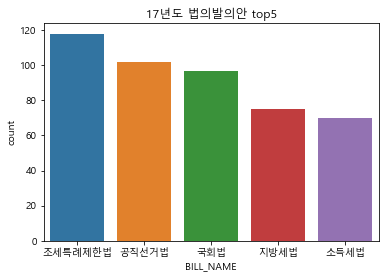

In [288]:
plt.title('17년도 법의발의안 top5')
sns.barplot(x=grouped_2017['BILL_NAME'],y=grouped_2017['count'])

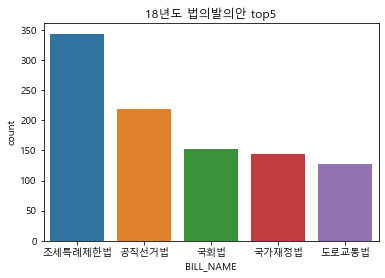

In [289]:
plt.title('18년도 법의발의안 top5')
sns.barplot(x=grouped_2018['BILL_NAME'],y=grouped_2018['count'])

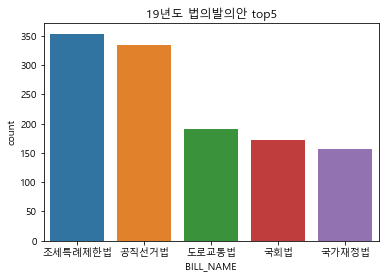

In [290]:
plt.title('19년도 법의발의안 top5')
sns.barplot(x=grouped_2019['BILL_NAME'],y=grouped_2019['count'])

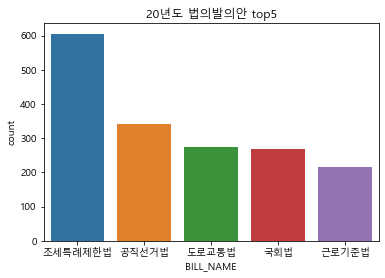

In [291]:
plt.title('20년도 법의발의안 top5')
sns.barplot(x=grouped_2020['BILL_NAME'],y=grouped_2020['count'])

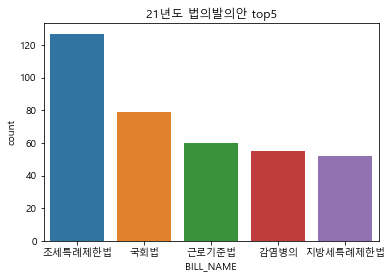

In [292]:
plt.title('21년도 법의발의안 top5')
sns.barplot(x=grouped_2021['BILL_NAME'],y=grouped_2021['count'])

## Q8. 대수별 처리안 건수는 어떻게 달라질까?

In [293]:
process.head(2)

,AGE,ANNOUNCE_DT,BDG_PRESENT_DT,BDG_PROC_DT,BDG_SUBMIT_DT,BILL_ID,BILL_KIND,BILL_NAME,BILL_NO,BLANK_TCNT,...,LINK_URL,NO_TCNT,PROC_RESULT_CD,PROPOSER,PROPOSER_KIND_CD,PROPOSE_DT,RGS_PRESENT_DT,RGS_PROC_DT,VOTE_TCNT,YES_TCNT
0,21,NaN,NaN,NaN,NaN,PRC_A2Q0T0X9B2P4F0M9N3P8K5S9I7K5N9,기타,본회의 의결을 요하는 국정감사대상기관 승인의 건(과학기술정보방송통신위원장),2104197,NaN,...,https://likms.assembly.go.kr/bill/billDetail.d...,NaN,원안가결,과학기술정보방송통신위원장,위원장,2020-09-24,2020-09-24,2020-09-24,NaN,NaN
1,21,NaN,NaN,NaN,NaN,PRC_W2L0P0M9C2X4P1E3A2N6C4B7T7K5M0,기타,과학기술정보방송통신위원장(박광온) 사임의 건(박광온의원),2104196,NaN,...,https://likms.assembly.go.kr/bill/billDetail.d...,NaN,원안가결,박광온의원,의원,2020-09-24,2020-09-24,2020-09-24,NaN,NaN


In [294]:
process.dtypes # 본회의 처리안건 데이터 타입

AGE                       int64
ANNOUNCE_DT              object
BDG_PRESENT_DT           object
BDG_PROC_DT              object
BDG_SUBMIT_DT            object
BILL_ID                  object
BILL_KIND                object
BILL_NAME                object
BILL_NO                   int64
BLANK_TCNT              float64
COMMITTEE_NM             object
COMMITTEE_PRESENT_DT     object
COMMITTEE_PROC_DT        object
COMMITTEE_SUBMIT_DT      object
CURR_TRANS_DT            object
LAW_PRESENT_DT           object
LAW_PROC_DT              object
LAW_SUBMIT_DT            object
LINK_URL                 object
NO_TCNT                 float64
PROC_RESULT_CD           object
PROPOSER                 object
PROPOSER_KIND_CD         object
PROPOSE_DT               object
RGS_PRESENT_DT           object
RGS_PROC_DT              object
VOTE_TCNT               float64
YES_TCNT                float64
dtype: object

In [300]:
process.describe(include='float')

,BLANK_TCNT,NO_TCNT,VOTE_TCNT,YES_TCNT
count,3333.000000,1160.000000,3692.000000,3692.000000
mean,6.082208,6.783621,201.366739,193.744854
std,6.554955,17.292706,30.422027,31.966445
min,1.000000,1.000000,148.000000,1.000000
25%,2.000000,1.000000,178.000000,172.000000
50%,4.000000,2.000000,200.000000,193.000000
75%,7.000000,5.000000,221.000000,214.000000
max,51.000000,156.000000,287.000000,287.000000


In [301]:
len(process)

68530

In [302]:
process.describe(include='object')

,ANNOUNCE_DT,BDG_PRESENT_DT,BDG_PROC_DT,BDG_SUBMIT_DT,BILL_ID,BILL_KIND,BILL_NAME,COMMITTEE_NM,COMMITTEE_PRESENT_DT,COMMITTEE_PROC_DT,...,LAW_PRESENT_DT,LAW_PROC_DT,LAW_SUBMIT_DT,LINK_URL,PROC_RESULT_CD,PROPOSER,PROPOSER_KIND_CD,PROPOSE_DT,RGS_PRESENT_DT,RGS_PROC_DT
count,15654,324,345,371,68530,68530,68530,65305,48713,23037,...,13562,13464,12902,68530,68521,68097,9387,68530,21561,68530
unique,1252,153,173,168,68242,4,56994,258,2686,3074,...,803,821,1340,68242,19,14929,5,9493,1705,3776
top,2020-06-09,2020-06-30,2020-07-03,2020-06-30,021933,법률안,휴회에관한건(의장),법제사법위원회,2019-07-12,2011-12-26,...,2015-12-30,2015-12-30,2017-09-21,https://likms.assembly.go.kr/bill/billDetail.d...,임기만료폐기,정부,의원,2008-11-28,2015-12-31,2020-05-29
freq,131,38,38,38,17,58532,216,5598,478,178,...,213,204,151,17,36841,10152,3887,351,211,15166


In [303]:
process.isnull().sum()

AGE                         0
ANNOUNCE_DT             52876
BDG_PRESENT_DT          68206
BDG_PROC_DT             68185
BDG_SUBMIT_DT           68159
BILL_ID                     0
BILL_KIND                   0
BILL_NAME                   0
BILL_NO                     0
BLANK_TCNT              65197
COMMITTEE_NM             3225
COMMITTEE_PRESENT_DT    19817
COMMITTEE_PROC_DT       45493
COMMITTEE_SUBMIT_DT     13518
CURR_TRANS_DT           50118
LAW_PRESENT_DT          54968
LAW_PROC_DT             55066
LAW_SUBMIT_DT           55628
LINK_URL                    0
NO_TCNT                 67370
PROC_RESULT_CD              9
PROPOSER                  433
PROPOSER_KIND_CD        59143
PROPOSE_DT                  0
RGS_PRESENT_DT          46969
RGS_PROC_DT                 0
VOTE_TCNT               64838
YES_TCNT                64838
dtype: int64

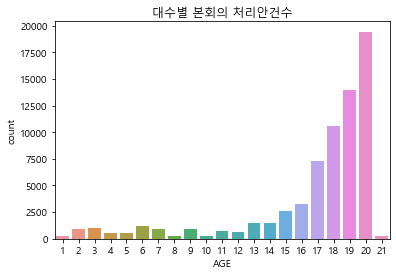

In [304]:
plt.title('대수별 본회의 처리안건수')
sns.countplot(process['AGE'])

## Q9. 처리안 건수 Top10 제안자는 누구일까?

In [313]:
process_copy = process

In [318]:
len(process_copy)

68530

In [342]:
process_copy = process_copy[process_copy['PROPOSER'].notnull()]

In [343]:
len(process_copy)

68097

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

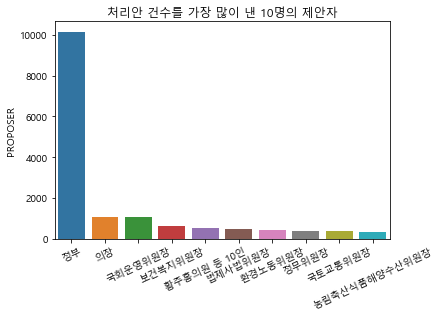

In [353]:
top10_proposer = process_copy['PROPOSER'].value_counts()[:10]
plt.title('처리안 건수를 가장 많이 낸 10명의 제안자')
sns.barplot(x=top10_proposer.index, y = top10_proposer)
plt.xticks(rotation=25)

## Q10. 대수별 총득표수 중 찬성, 반대, 기권 비율 추세 비교하면 어떨까?

In [362]:
vote_cnt = process[['AGE','VOTE_TCNT','YES_TCNT','NO_TCNT','BLANK_TCNT']]

In [363]:
vote_cnt['yes_ratio'] = vote_cnt['YES_TCNT']/vote_cnt['VOTE_TCNT']

In [365]:
vote_cnt['no_ratio'] = vote_cnt['NO_TCNT']/vote_cnt['VOTE_TCNT']
vote_cnt['blank_ratio'] = vote_cnt['BLANK_TCNT']/vote_cnt['VOTE_TCNT']

In [372]:
vote_cnt['yes_ratio'] = vote_cnt['yes_ratio'].apply(lambda x : x if x >=0 else 0)
vote_cnt['no_ratio'] = vote_cnt['no_ratio'].apply(lambda x : x if x >=0 else 0)
vote_cnt['blank_ratio'] = vote_cnt['blank_ratio'].apply(lambda x : x if x >=0 else 0)

In [374]:
vote_cnt[5:10]

,AGE,VOTE_TCNT,YES_TCNT,NO_TCNT,BLANK_TCNT,yes_ratio,no_ratio,blank_ratio
5,21,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
6,21,260.0,230.0,14.0,16.0,0.884615,0.053846,0.061538
7,21,269.0,263.0,NaN,6.0,0.977695,0.000000,0.022305
8,21,266.0,258.0,NaN,8.0,0.969925,0.000000,0.030075
9,21,265.0,259.0,1.0,5.0,0.977358,0.003774,0.018868


In [381]:
mean_yes_ratio = vote_cnt['yes_ratio'].groupby(vote_cnt['AGE']).mean()
mean_no_ratio = vote_cnt['no_ratio'].groupby(vote_cnt['AGE']).mean()
mean_blank_ratio = vote_cnt['blank_ratio'].groupby(vote_cnt['AGE']).mean()

In [386]:
vote_cnt[vote_cnt['AGE']==5]['YES_TCNT'].unique() # 20,21대수를 제외하고 투표수 데이터 없음
# 왜 없지? 데이터를 구할 수 있는가? 크롤링?

array([nan])

In [393]:
mean_ratio = pd.DataFrame({'age': mean_yes_ratio.index,
                          'mean_yes_ratio': mean_yes_ratio,
                          'mean_no_ratio': mean_no_ratio,
                          'mean_blank_ratio': mean_blank_ratio})
mean_ratio.reset_index(inplace=True)
mean_ratio.drop('AGE',axis=1,inplace=True)
mean_ratio

,age,mean_yes_ratio,mean_no_ratio,mean_blank_ratio
0,1,0.000000,0.000000,0.000000
1,2,0.000000,0.000000,0.000000
2,3,0.000000,0.000000,0.000000
3,4,0.000000,0.000000,0.000000
4,5,0.000000,0.000000,0.000000
5,6,0.000000,0.000000,0.000000
6,7,0.000000,0.000000,0.000000
7,8,0.000000,0.000000,0.000000
8,9,0.000000,0.000000,0.000000
9,10,0.000000,0.000000,0.000000


In [414]:
# mean_ratio = mean_ratio[-2:]
mean_ratio_20 = mean_ratio.iloc[[0],1:4]
mean_ratio_21 = mean_ratio.iloc[[1],1:4]

In [417]:
mean_ratio_20.round(2)

,mean_yes_ratio,mean_no_ratio,mean_blank_ratio
19,0.18,0.0,0.0


In [418]:
mean_ratio_21.round(2)

,mean_yes_ratio,mean_no_ratio,mean_blank_ratio
20,0.62,0.01,0.02


In [419]:
df_cnt_ratio = pd.DataFrame({'age':[20,20,20,21,21,21],
                            'kind':['yes','no','blank','yes','no','blank'],
                            'mean_ratio': [0.18,0,0,0.62,0.01,0.02]})
df_cnt_ratio

,age,kind,mean_ratio
0,20,yes,0.18
1,20,no,0.00
2,20,blank,0.00
3,21,yes,0.62
4,21,no,0.01
5,21,blank,0.02


<Figure size 432x288 with 0 Axes>

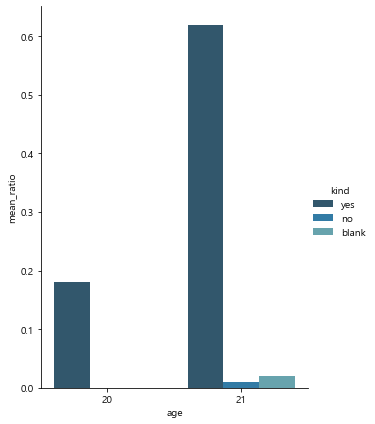

In [423]:
plt.figure(figsize=(6,4))
sns.catplot(x="age", y="mean_ratio", hue="kind",
                capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="bar", data=df_cnt_ratio)

## Q11. 대수별 제안하고 공포하기까지 걸리는 기간은 어떨까?

In [10]:
print('공표일 결측치 :',process['ANNOUNCE_DT'].isnull().sum(),'개')
print('제안일 결측치 :',process['PROPOSE_DT'].isnull().sum(),'개')

공표일 결측치 : 52876 개
제안일 결측치 : 0 개


In [37]:
process_copy = process[['PROPOSE_DT','ANNOUNCE_DT','AGE']]

In [38]:
process_notnull = process_copy[process_copy['ANNOUNCE_DT'].notnull()]
process_notnull.reset_index(inplace=True)
process_notnull.drop('index',axis=1,inplace=True)
process_notnull.head()

,PROPOSE_DT,ANNOUNCE_DT,AGE
0,2020-08-03,2020-08-18,21
1,2020-08-03,2020-08-18,21
2,2020-08-03,2020-08-18,21
3,2020-08-03,2020-08-12,21
4,2020-07-29,2020-07-31,21


In [39]:
process_notnull.dtypes

PROPOSE_DT     object
ANNOUNCE_DT    object
AGE             int64
dtype: object

In [52]:
process_notnull['PROPOSE_DT'] = pd.to_datetime(process_notnull['PROPOSE_DT'])
process_notnull['ANNOUNCE_DT'] = pd.to_datetime(process_notnull['ANNOUNCE_DT'],errors = 'coerce') # Out of Boundary Error

In [53]:
process_notnull['diff_dt'] = 0

In [154]:
process_notnull['diff_dt'] = process_notnull['ANNOUNCE_DT'] - process_notnull['PROPOSE_DT']
process_notnull.head()

,PROPOSE_DT,ANNOUNCE_DT,AGE,diff_dt
0,2020-08-03,2020-08-18,21,15 days
1,2020-08-03,2020-08-18,21,15 days
2,2020-08-03,2020-08-18,21,15 days
3,2020-08-03,2020-08-12,21,9 days
4,2020-07-29,2020-07-31,21,2 days


In [56]:
process_notnull['AGE'].value_counts()[:5]

20    3203
19    2788
18    2349
17    1912
16     941
Name: AGE, dtype: int64

In [155]:
process_notnull[process_notnull['PROPOSE_DT'] > process_notnull['ANNOUNCE_DT']] # 공포보다 제안을 뒤에 한 경우

,PROPOSE_DT,ANNOUNCE_DT,AGE,diff_dt
11185,2000-07-29,2000-01-08,16,-203 days
14557,1968-12-19,1968-01-28,7,-326 days
14584,1968-11-15,1963-12-21,7,-1791 days
14669,1967-12-22,1963-03-18,7,-1740 days
14730,1967-03-02,1963-03-30,6,-1433 days


In [156]:
process_notnull = process_notnull[process_notnull['PROPOSE_DT'] <= process_notnull['ANNOUNCE_DT']] # 제안일이 공포일보다 전에 일어난 경우만

In [157]:
process_notnull['diff_dt'] = process_notnull['diff_dt'].astype('str')
process_notnull['diff_dt'][:5]

0    15 days 00:00:00.000000000
1    15 days 00:00:00.000000000
2    15 days 00:00:00.000000000
3     9 days 00:00:00.000000000
4     2 days 00:00:00.000000000
Name: diff_dt, dtype: object

In [158]:
process_notnull['diff_dt'] = process_notnull['diff_dt'].apply(lambda x : re.findall('\d+',x)[0])
process_notnull

,PROPOSE_DT,ANNOUNCE_DT,AGE,diff_dt
0,2020-08-03,2020-08-18,21,15
1,2020-08-03,2020-08-18,21,15
2,2020-08-03,2020-08-18,21,15
3,2020-08-03,2020-08-12,21,9
4,2020-07-29,2020-07-31,21,2
5,2020-07-14,2020-08-12,21,29
6,2020-07-13,2020-08-18,21,36
7,2020-07-10,2020-08-18,21,39
8,2020-07-10,2020-08-12,21,33
9,2020-07-10,2020-08-18,21,39


In [159]:
process_notnull.reset_index(inplace=True)

In [161]:
process_notnull.drop('index',axis=1,inplace=True)
process_notnull.head()

,PROPOSE_DT,ANNOUNCE_DT,AGE,diff_dt
0,2020-08-03,2020-08-18,21,15
1,2020-08-03,2020-08-18,21,15
2,2020-08-03,2020-08-18,21,15
3,2020-08-03,2020-08-12,21,9
4,2020-07-29,2020-07-31,21,2


In [163]:
process_notnull['diff_dt'] = process_notnull['diff_dt'].astype('int')

In [166]:
mean_diff_dt = process_notnull.groupby('AGE')['diff_dt'].mean()
mean_diff_dt

AGE
1     124.829630
2     105.817204
3     165.642857
4      69.125000
5      56.390625
6     132.162577
7     137.108883
8     134.447368
9      76.986891
10     72.375000
11     95.107463
12     96.658654
13     72.533917
14     80.735152
15     75.140698
16    120.730851
17    149.984833
18    153.618135
19    163.360115
20    167.555729
21     37.684211
Name: diff_dt, dtype: float64

In [170]:
mean_diff_dt = mean_diff_dt.to_frame()
mean_diff_dt.reset_index(inplace=True)
mean_diff_dt

,AGE,diff_dt
0,1,124.829630
1,2,105.817204
2,3,165.642857
3,4,69.125000
4,5,56.390625
5,6,132.162577
6,7,137.108883
7,8,134.447368
8,9,76.986891
9,10,72.375000


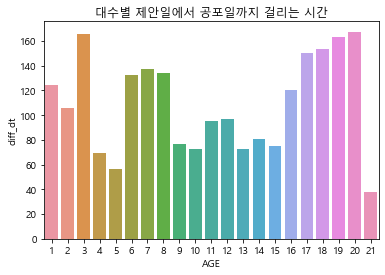

In [173]:
plt.title('대수별 제안일에서 공포일까지 걸리는 시간')
sns.barplot(x=mean_diff_dt['AGE'],y=mean_diff_dt['diff_dt'])

## Q.12 제안일과 공포일의 월별 요일별로 분포는 어떻게 되는가?

In [198]:
process_dt = process

In [199]:
process_dt['PROPOSE_DT'] = pd.to_datetime(process_dt['PROPOSE_DT'])
process_dt['ANNOUNCE_DT'] = pd.to_datetime(process_dt['ANNOUNCE_DT'],errors = 'coerce') # Out of Boundary Error

In [200]:
process_dt['propose_month'] = process_dt['PROPOSE_DT'].dt.month
process_dt['announce_month'] = process_dt['ANNOUNCE_DT'].dt.month
process_dt['propose_weekday'] = process_dt['PROPOSE_DT'].dt.weekday

In [201]:
process_dt['propose_weekday'] = process_dt['PROPOSE_DT'].dt.weekday # weekday (0:월 1:화 2:수 3:목 4:금 5:토 6:일)
process_dt['announce_weekday'] = process_dt['ANNOUNCE_DT'].dt.weekday
process_dt.head(2)

,AGE,ANNOUNCE_DT,BDG_PRESENT_DT,BDG_PROC_DT,BDG_SUBMIT_DT,BILL_ID,BILL_KIND,BILL_NAME,BILL_NO,BLANK_TCNT,...,PROPOSER_KIND_CD,PROPOSE_DT,RGS_PRESENT_DT,RGS_PROC_DT,VOTE_TCNT,YES_TCNT,propose_month,announce_month,propose_weekday,announce_weekday
0,21,NaT,NaN,NaN,NaN,PRC_A2Q0T0X9B2P4F0M9N3P8K5S9I7K5N9,기타,본회의 의결을 요하는 국정감사대상기관 승인의 건(과학기술정보방송통신위원장),2104197,NaN,...,위원장,2020-09-24,2020-09-24,2020-09-24,NaN,NaN,9,NaN,3,NaN
1,21,NaT,NaN,NaN,NaN,PRC_W2L0P0M9C2X4P1E3A2N6C4B7T7K5M0,기타,과학기술정보방송통신위원장(박광온) 사임의 건(박광온의원),2104196,NaN,...,의원,2020-09-24,2020-09-24,2020-09-24,NaN,NaN,9,NaN,3,NaN


In [204]:
process_dt = process_dt[['propose_month','announce_month','propose_weekday','announce_weekday']]
process_dt.tail()

,propose_month,announce_month,propose_weekday,announce_weekday
68525,6,7.0,2,5.0
68526,6,10.0,1,5.0
68527,5,NaN,0,NaN
68528,8,9.0,5,2.0
68529,4,NaN,0,NaN


In [214]:
process_dt['announce_month'] = pd.to_numeric(process_dt['announce_month'],downcast='integer',errors='coerce')

In [215]:
process_dt['announce_month'][68528].dtype

dtype('float64')

In [216]:
process_dt['propose_month'].value_counts()

11    9581
12    8807
10    6792
9     6511
7     5522
6     5398
8     4816
3     4509
2     4435
4     4323
5     4190
1     3646
Name: propose_month, dtype: int64

In [182]:
process_dt['propose_weekday'].value_counts()

4    14692
2    13484
3    13339
0    12672
1    12268
5     1970
6      105
Name: propose_weekday, dtype: int64

In [217]:
process_dt['announce_month'].value_counts()

12.0    4548
1.0     2162
3.0     2131
5.0     1311
2.0     1006
4.0      969
8.0      922
7.0      727
6.0      617
10.0     553
11.0     439
9.0      268
Name: announce_month, dtype: int64

In [184]:
process_dt['announce_weekday'].value_counts()

1.0    5200
4.0    2943
2.0    2654
3.0    2005
0.0    1751
5.0     922
6.0     178
Name: announce_weekday, dtype: int64

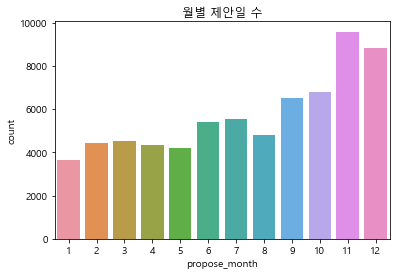

In [185]:
plt.title('월별 제안일 수')
sns.countplot(process_dt['propose_month'])

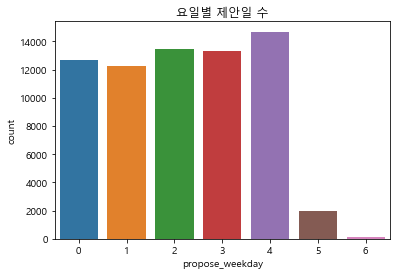

In [186]:
plt.title('요일별 제안일 수')
sns.countplot(process_dt['propose_weekday'])

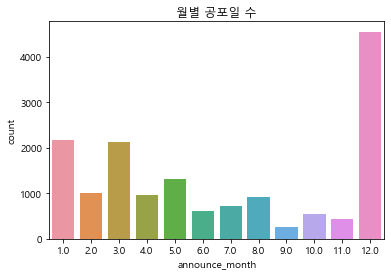

In [187]:
plt.title('월별 공포일 수')
sns.countplot(process_dt['announce_month'])

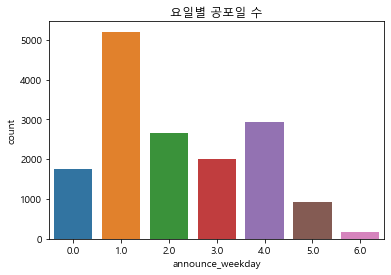

In [218]:
plt.title('요일별 공포일 수')
sns.countplot(process_dt['announce_weekday'])

## Q13. 대수별 정부이송일에서 공포일까지 걸리는 평균 시간은 얼마일까?

In [15]:
mean_df_dt2 = process.copy()
mean_df_dt2 = mean_df_dt2[['AGE','CURR_TRANS_DT','ANNOUNCE_DT']]
mean_df_dt2 = mean_df_dt2.dropna()
mean_df_dt2 = mean_df_dt2.reset_index()
mean_df_dt2 = mean_df_dt2.drop('index',axis=1)
mean_df_dt2.head()

,AGE,CURR_TRANS_DT,ANNOUNCE_DT
0,21,2020-08-07,2020-08-18
1,21,2020-08-07,2020-08-18
2,21,2020-08-07,2020-08-18
3,21,2020-08-07,2020-08-12
4,21,2020-07-30,2020-07-31


In [16]:
len(mean_df_dt2)

15545

In [18]:
mean_df_dt2['CURR_TRANS_DT'] = pd.to_datetime(mean_df_dt2['CURR_TRANS_DT'],errors='coerce')
mean_df_dt2['ANNOUNCE_DT'] = pd.to_datetime(mean_df_dt2['ANNOUNCE_DT'],errors='coerce')

In [25]:
mean_df_dt2 = mean_df_dt2.dropna()
mean_df_dt2.isnull().sum()

AGE              0
CURR_TRANS_DT    0
ANNOUNCE_DT      0
dtype: int64

In [26]:
len(mean_df_dt2)

15543

In [27]:
mean_df_dt2['mean_df_dt2'] = mean_df_dt2['ANNOUNCE_DT']-mean_df_dt2['CURR_TRANS_DT']
mean_df_dt2.head()

,AGE,CURR_TRANS_DT,ANNOUNCE_DT,mean_df_dt2
0,21,2020-08-07,2020-08-18,11 days
1,21,2020-08-07,2020-08-18,11 days
2,21,2020-08-07,2020-08-18,11 days
3,21,2020-08-07,2020-08-12,5 days
4,21,2020-07-30,2020-07-31,1 days


In [28]:
mean_df_dt2[mean_df_dt2['ANNOUNCE_DT'] < mean_df_dt2['CURR_TRANS_DT']]

,AGE,CURR_TRANS_DT,ANNOUNCE_DT,mean_df_dt2
11185,16,2000-12-30,2000-01-08,-357 days
11597,15,1999-12-18,1998-12-30,-353 days
12698,13,1991-12-29,1991-12-14,-15 days
14034,9,1976-12-23,1976-11-05,-48 days
14547,7,1969-01-13,1968-01-28,-351 days
14574,7,1968-12-20,1963-12-21,-1826 days
14659,7,1968-03-05,1963-03-18,-1814 days
14720,6,1967-03-16,1963-03-30,-1447 days
15252,3,1956-02-17,1956-02-13,-4 days
15522,1,1959-09-26,1949-10-10,-3638 days


In [35]:
mean_df_dt2 = mean_df_dt2[mean_df_dt2['ANNOUNCE_DT'] >= mean_df_dt2['CURR_TRANS_DT']]

In [36]:
mean_df_dt2['mean_df_dt2'] = mean_df_dt2['ANNOUNCE_DT']-mean_df_dt2['CURR_TRANS_DT']
mean_df_dt2.head()

,AGE,CURR_TRANS_DT,ANNOUNCE_DT,mean_df_dt2
0,21,2020-08-07,2020-08-18,11 days
1,21,2020-08-07,2020-08-18,11 days
2,21,2020-08-07,2020-08-18,11 days
3,21,2020-08-07,2020-08-12,5 days
4,21,2020-07-30,2020-07-31,1 days


In [40]:
mean_df_dt2['mean_df_dt2'] =mean_df_dt2['mean_df_dt2'].astype('str')
mean_df_dt2['mean_df_dt2'] = mean_df_dt2['mean_df_dt2'].apply(lambda x : re.findall('\d+',x)[0])
mean_df_dt2.head()

,AGE,CURR_TRANS_DT,ANNOUNCE_DT,mean_df_dt2
0,21,2020-08-07,2020-08-18,11
1,21,2020-08-07,2020-08-18,11
2,21,2020-08-07,2020-08-18,11
3,21,2020-08-07,2020-08-12,5
4,21,2020-07-30,2020-07-31,1


In [42]:
mean_df_dt2['mean_df_dt2'] = mean_df_dt2['mean_df_dt2'].astype('int')
mean_df_dt2 = mean_df_dt2.groupby('AGE')['mean_df_dt2'].mean()
mean_df_dt2 = mean_df_dt2.to_frame()
mean_df_dt2.reset_index(inplace=True)
mean_df_dt2.head()

,AGE,mean_df_dt2
0,1,12.977778
1,2,11.646739
2,3,35.882353
3,4,5.416667
4,5,3.696429


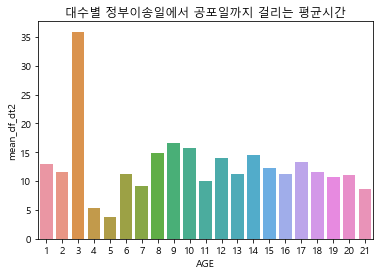

In [43]:
plt.title('대수별 정부이송일에서 공포일까지 걸리는 평균시간')
sns.barplot(x=mean_df_dt2['AGE'],y=mean_df_dt2['mean_df_dt2'])

## Q14. 정부이송일은 월별, 요일별 분포는 어떨까?

In [46]:
process_dt2 = process.copy()
process_dt2['CURR_TRANS_DT'] = pd.to_datetime(process_dt2['CURR_TRANS_DT'],errors='coerce')
process_dt2['curr_trans_month'] = process_dt2['CURR_TRANS_DT'].dt.month
process_dt2['curr_trans_weekday'] = process_dt2['CURR_TRANS_DT'].dt.weekday # weekday (0:월 1:화 2:수 3:목 4:금 5:토 6:일)


process_dt2 = process_dt2[['curr_trans_month','curr_trans_weekday']]
process_dt2.tail()

# process_dt2['announce_month'] = pd.to_numeric(process_dt2['announce_month'],downcast='integer',errors='coerce')


,curr_trans_month,curr_trans_weekday
68525,NaN,NaN
68526,9.0,5.0
68527,NaN,NaN
68528,NaN,NaN
68529,NaN,NaN


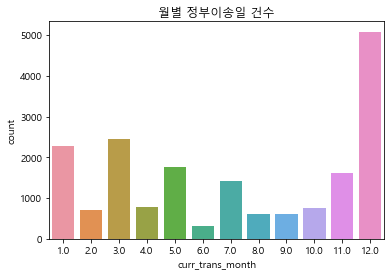

In [47]:
plt.title('월별 정부이송일 건수')
sns.countplot(process_dt2['curr_trans_month'])

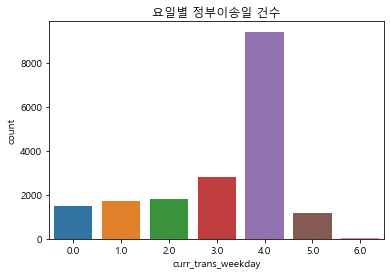

In [48]:
plt.title('요일별 정부이송일 건수')
sns.countplot(process_dt2['curr_trans_weekday'])

## Q15. 대수별 의결을 가장 많이 가결시킨 제안자는 누구인가?

In [49]:
process['PROPOSER_KIND_CD'].value_counts()

의원     3887
위원장    2418
정부     1926
의장     1095
기타       61
Name: PROPOSER_KIND_CD, dtype: int64

In [50]:
len(process['PROPOSER'].unique())

14930

In [62]:
process['PROC_RESULT_CD'].value_counts()

임기만료폐기       36841
원안가결         16291
수정가결          7208
폐기            2874
대안반영폐기        2459
철회            1415
회기불계속폐기        911
부결             217
비상국무회의로이관      106
불허가             82
반려              75
수정안반영폐기         24
채택               4
부동의              3
불승인              3
심사대상제외           2
의결불요             2
가결               2
각하               2
Name: PROC_RESULT_CD, dtype: int64

In [83]:
mask = (process['PROC_RESULT_CD']=='원안가결') | (process['PROC_RESULT_CD']=='수정가결') | (process['PROC_RESULT_CD']=='가결')
pass_df = process[mask]
pass_df['PROC_RESULT_CD'].head()

0    원안가결
1    원안가결
2    원안가결
3    원안가결
4    원안가결
Name: PROC_RESULT_CD, dtype: object

In [84]:
pass_df = pass_df.groupby(['AGE','PROPOSER_KIND_CD']).size().to_frame()
pass_df = pass_df.reset_index()
pass_df = pass_df.rename(columns={0:'count'})

In [88]:
pass_df['cum_count'] = pass_df.groupby('AGE')['count'].cumsum(axis=0)
pass_df['norm_count'] = pass_df.groupby('AGE')['count'].apply(lambda x : x/sum(x))
pass_df['cum_norm_count'] = pass_df.groupby('AGE')['norm_count'].cumsum(axis=0)
pass_df = pass_df.sort_values(by=['cum_norm_count'],ascending=False)
pass_df.head(10)

,AGE,PROPOSER_KIND_CD,count,cum_count,norm_count,cum_norm_count
0,1,위원장,1,1,1.000000,1.0
18,5,정부,21,139,0.151079,1.0
88,20,정부,156,559,0.279070,1.0
83,19,정부,158,637,0.248038,1.0
78,18,정부,150,588,0.255102,1.0
73,17,정부,204,659,0.309560,1.0
68,16,정부,173,585,0.295726,1.0
63,15,정부,102,483,0.211180,1.0
55,13,정부,84,358,0.234637,1.0
50,12,정부,52,183,0.284153,1.0


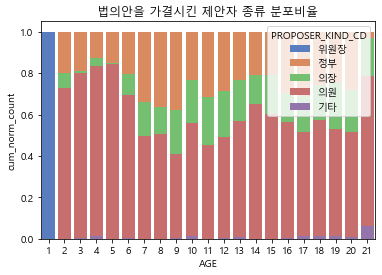

In [90]:
plt.title('법의안을 가결시킨 제안자 종류 분포비율')
sns.barplot(x='AGE',y='cum_norm_count',hue='PROPOSER_KIND_CD',data=pass_df,dodge=False,palette='muted')

## Q16. 대수별 폐기를 가장 많이 시킨 제안자 종류별 분포 현황은?

In [91]:
mask = (process['PROC_RESULT_CD']=='임기만료폐기') | (process['PROC_RESULT_CD']=='대안반영폐기') | (process['PROC_RESULT_CD']=='회기불계속폐기') | (process['PROC_RESULT_CD']=='수정안반영폐기') | (process['PROC_RESULT_CD']=='폐기')
fail_df = process[mask]

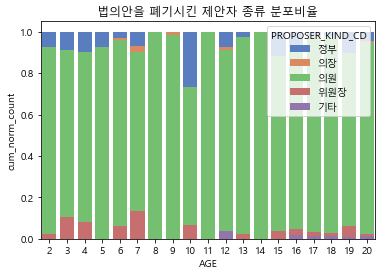

In [92]:
fail_df = fail_df.groupby(['AGE','PROPOSER_KIND_CD']).size().to_frame()
fail_df = fail_df.reset_index()
fail_df = fail_df.rename(columns={0:'count'})

fail_df['cum_count'] = fail_df.groupby('AGE')['count'].cumsum(axis=0)
fail_df['norm_count'] = fail_df.groupby('AGE')['count'].apply(lambda x : x/sum(x))
fail_df['cum_norm_count'] = fail_df.groupby('AGE')['norm_count'].cumsum(axis=0)
fail_df = fail_df.sort_values(by=['cum_norm_count'],ascending=False)

plt.title('법의안을 폐기시킨 제안자 종류 분포비율')
sns.barplot(x='AGE',y='cum_norm_count',hue='PROPOSER_KIND_CD',data=fail_df,dodge=False,palette='muted')

## Q17. 대수별 가결을 가장 많이 성사시킨 소관위원회는 어디일까?

In [93]:
process['COMMITTEE_NM'].value_counts()

법제사법위원회                                             5598
보건복지위원회                                             5372
환경노동위원회                                             4124
행정안전위원회                                             3829
기획재정위원회                                             3522
정무위원회                                               3370
국토교통위원회                                             2766
국회운영위원회                                             2656
재정경제위원회                                             2413
농림축산식품해양수산위원회                                       2068
안전행정위원회                                             1867
본회의                                                 1748
국방위원회                                               1659
교육문화체육관광위원회                                         1524
행정자치위원회                                             1493
교육위원회                                               1477
산업통상자원중소벤처기업위원회                                     1102
국토해양위원회                        